In [1]:
# ============================================
# 01_eda.ipynb — Exploratory Data Analysis
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot settings
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

# Create EDA output folder
os.makedirs("../results/eda_plots", exist_ok=True)

# ============================================
# 1. Load Dataset
# ============================================

df = pd.read_csv("../data/raw/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
# ============================================
# 2. Basic Info
# ============================================

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


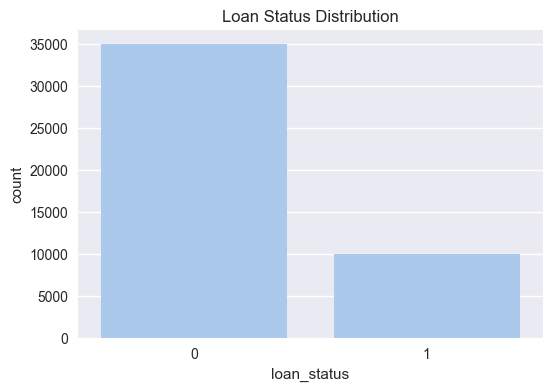

In [3]:
# ============================================
# 3. Target Variable Distribution
# ============================================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="loan_status")
plt.title("Loan Status Distribution")
plt.savefig("../results/eda_plots/loan_status_distribution.png")
plt.show()

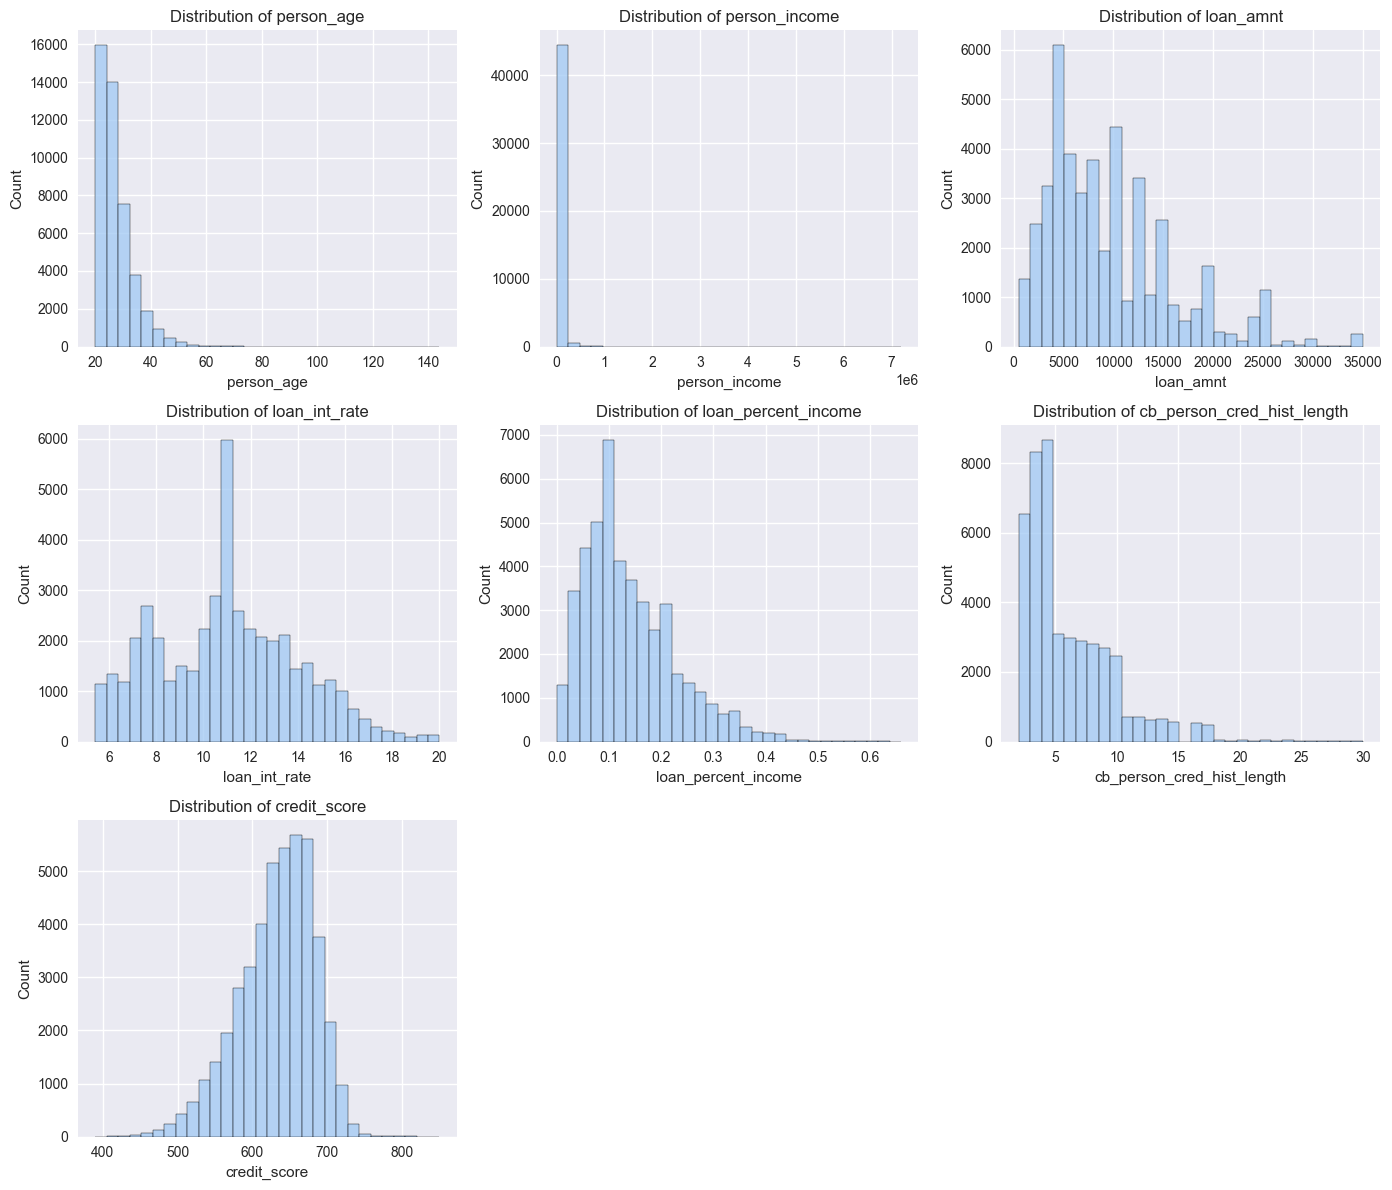

In [4]:
# ============================================
# 4. Numeric Feature Distributions
# ============================================

numeric_cols = ['person_age','person_income','loan_amnt','loan_int_rate',
                'loan_percent_income','cb_person_cred_hist_length','credit_score']

plt.figure(figsize=(14,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("../results/eda_plots/numeric_histograms.png")
plt.show()

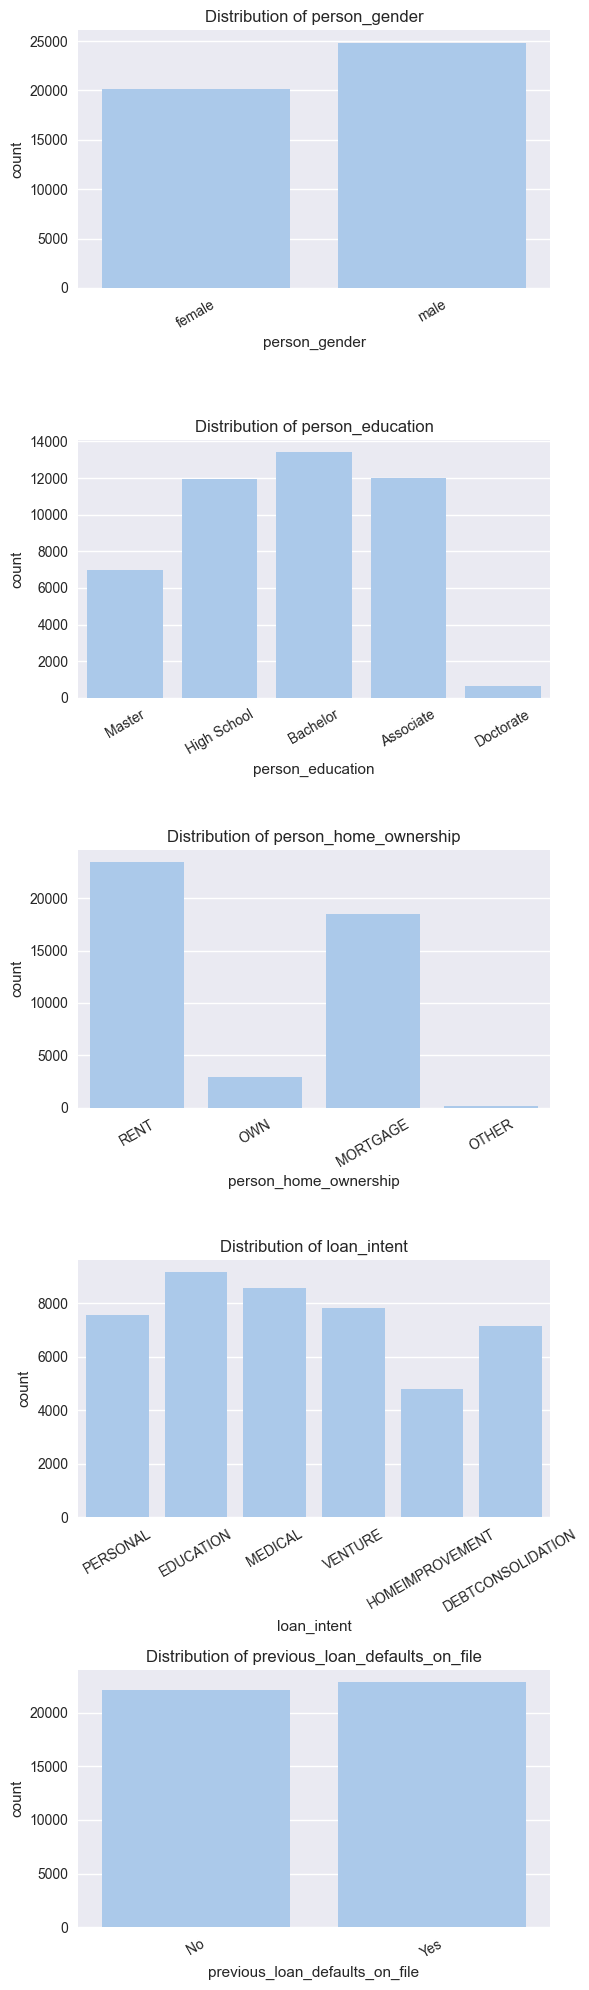

In [5]:
# ============================================
# 5. Categorical Feature Distributions
# ============================================

categorical_cols = ['person_gender','person_education','person_home_ownership',
                    'loan_intent','previous_loan_defaults_on_file']

plt.figure(figsize=(6, len(categorical_cols)*4))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols),1,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("../results/eda_plots/categorical_countplots.png")
plt.show()

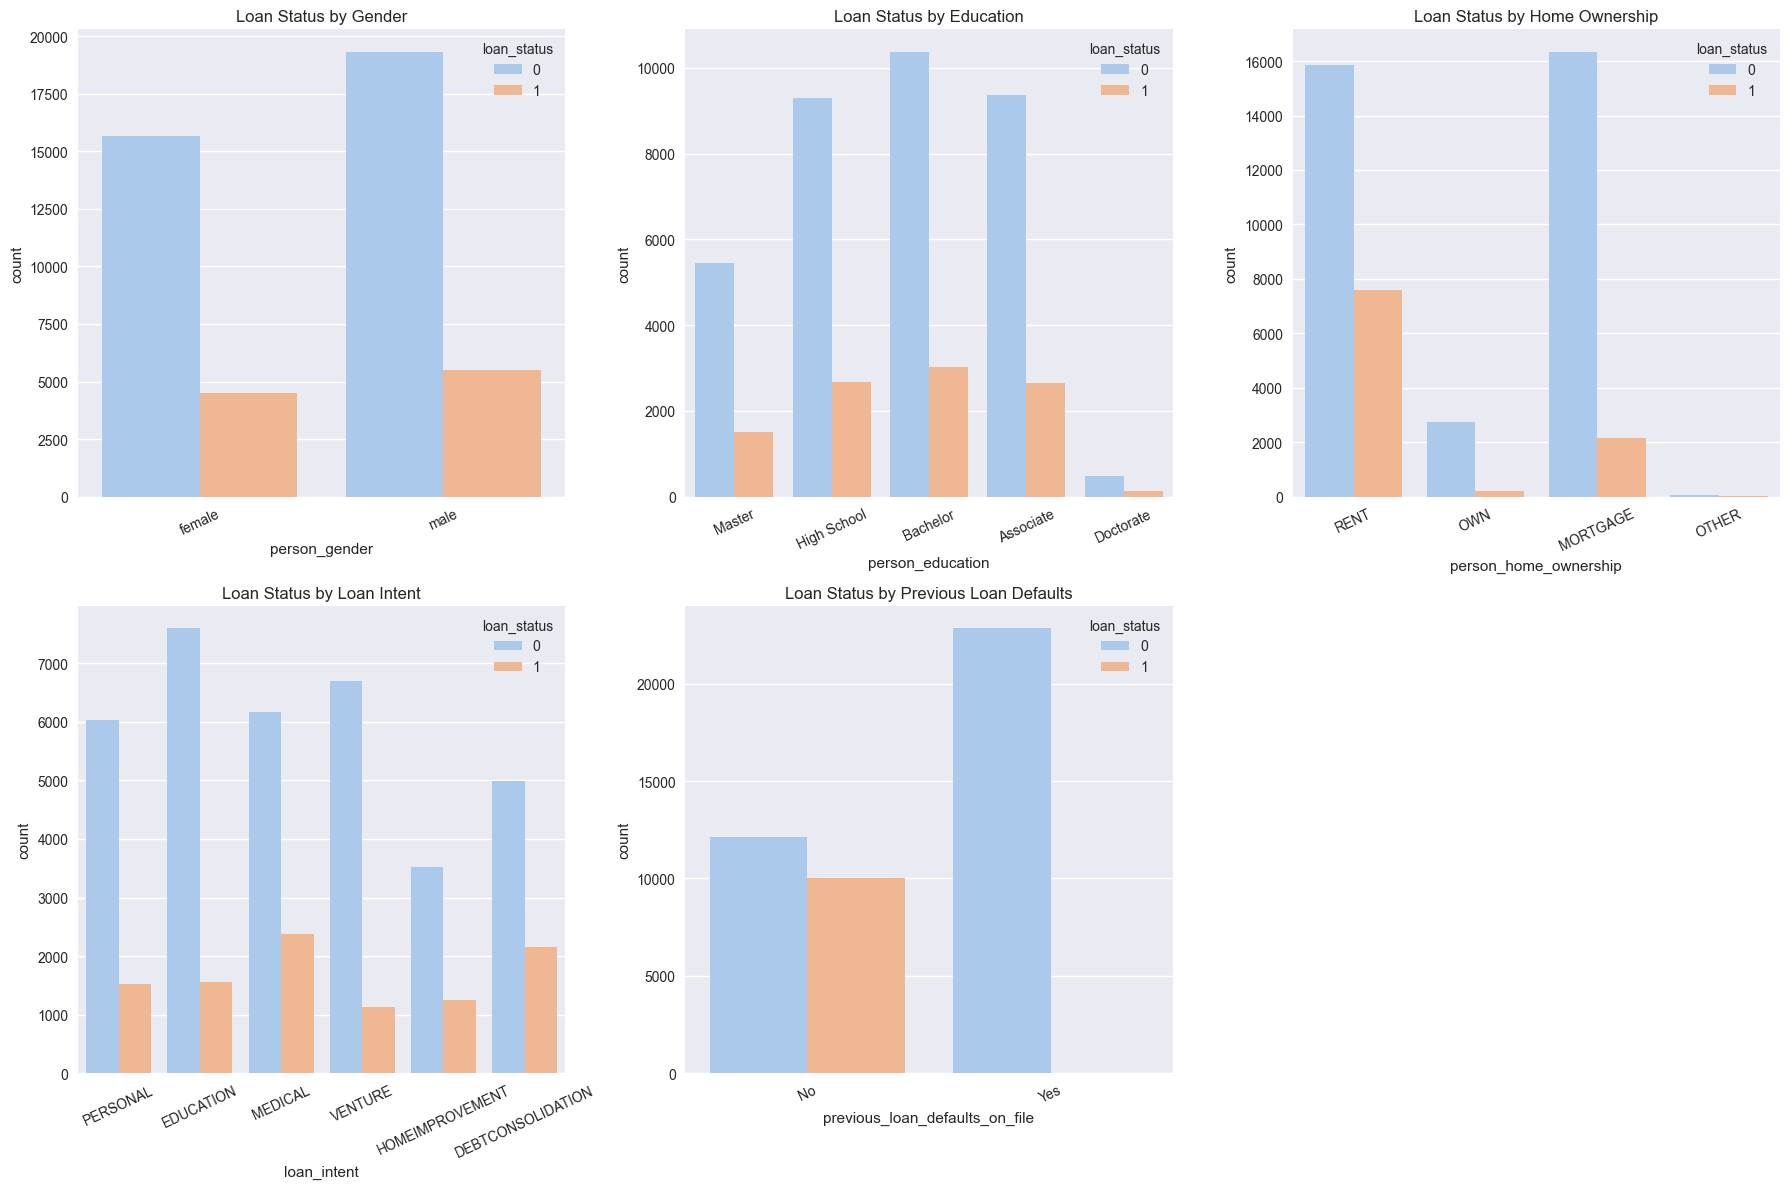

In [6]:
# ============================================
# 6. Loan Status by Categorical Variables
# ============================================

features = [
    ('person_gender','Gender'),
    ('person_education','Education'),
    ('person_home_ownership','Home Ownership'),
    ('loan_intent','Loan Intent'),
    ('previous_loan_defaults_on_file','Previous Loan Defaults')
]

plt.figure(figsize=(18,12))

for i, (col, title) in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col, hue="loan_status")
    plt.title(f"Loan Status by {title}")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.savefig("../results/eda_plots/loan_status_by_categorical.png")
plt.show()

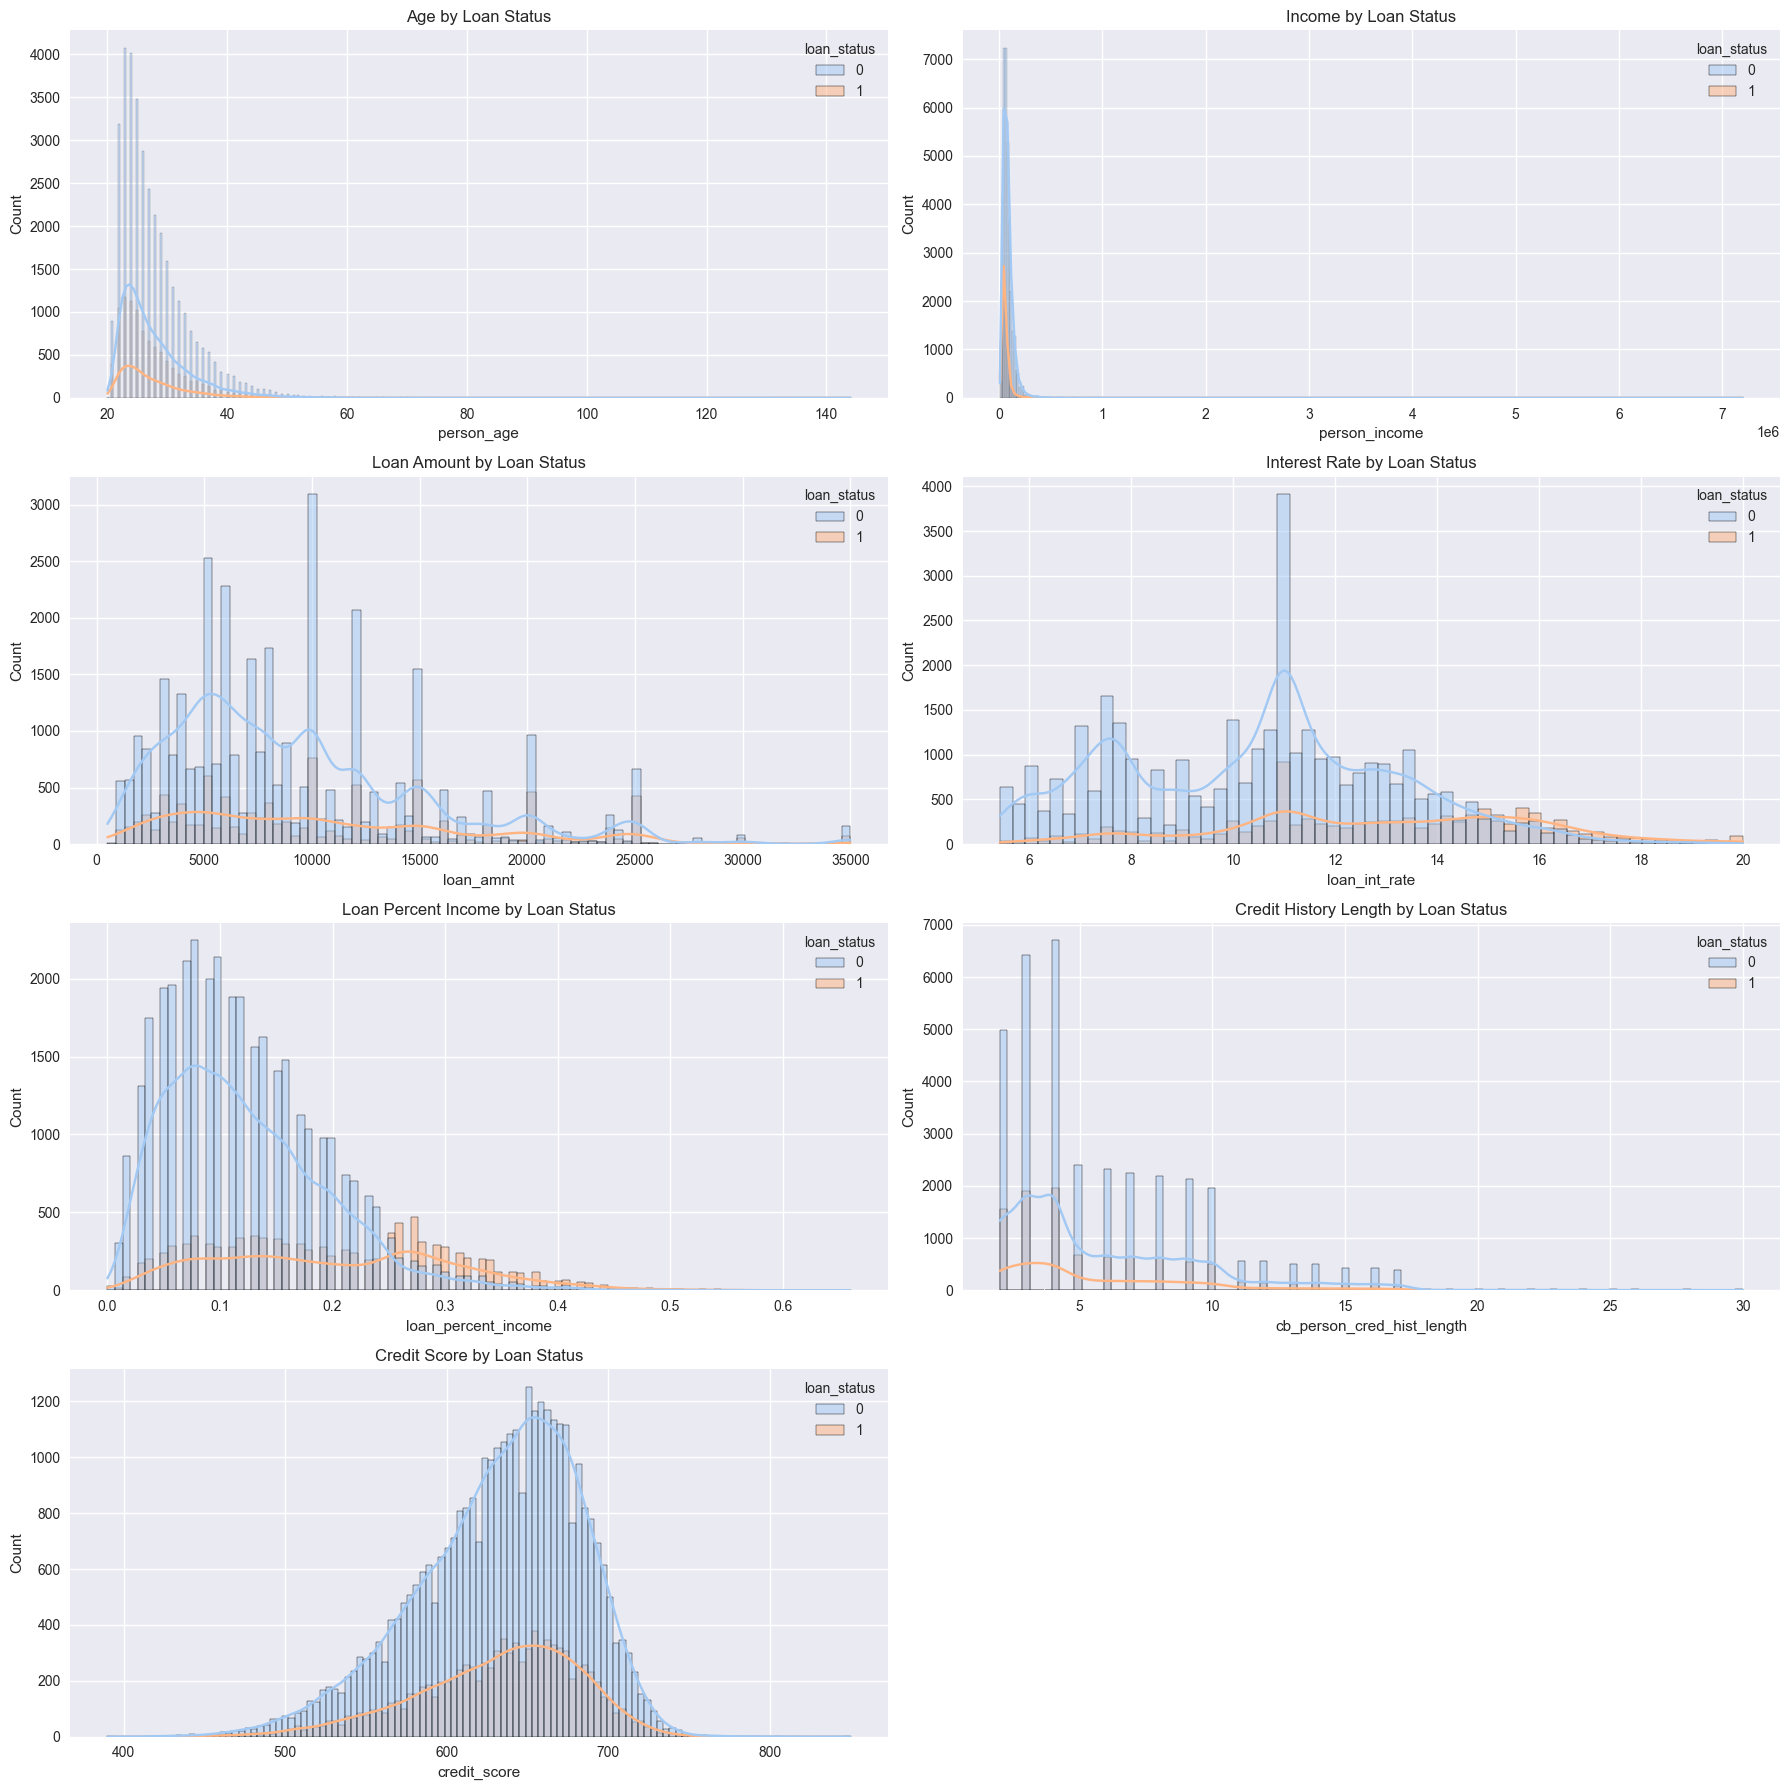

In [7]:
# ============================================
# 7. Loan Status by Numeric Variables
# ============================================

numeric_cols = [
    ('person_age','Age'),
    ('person_income','Income'),
    ('loan_amnt','Loan Amount'),
    ('loan_int_rate','Interest Rate'),
    ('loan_percent_income','Loan Percent Income'),
    ('cb_person_cred_hist_length','Credit History Length'),
    ('credit_score','Credit Score')
]

plt.figure(figsize=(18,18))

for i, (col, title) in enumerate(numeric_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df, x=col, hue='loan_status', kde=True)
    plt.title(f"{title} by Loan Status")

plt.tight_layout()
plt.savefig("../results/eda_plots/loan_status_by_numeric.png")
plt.show()

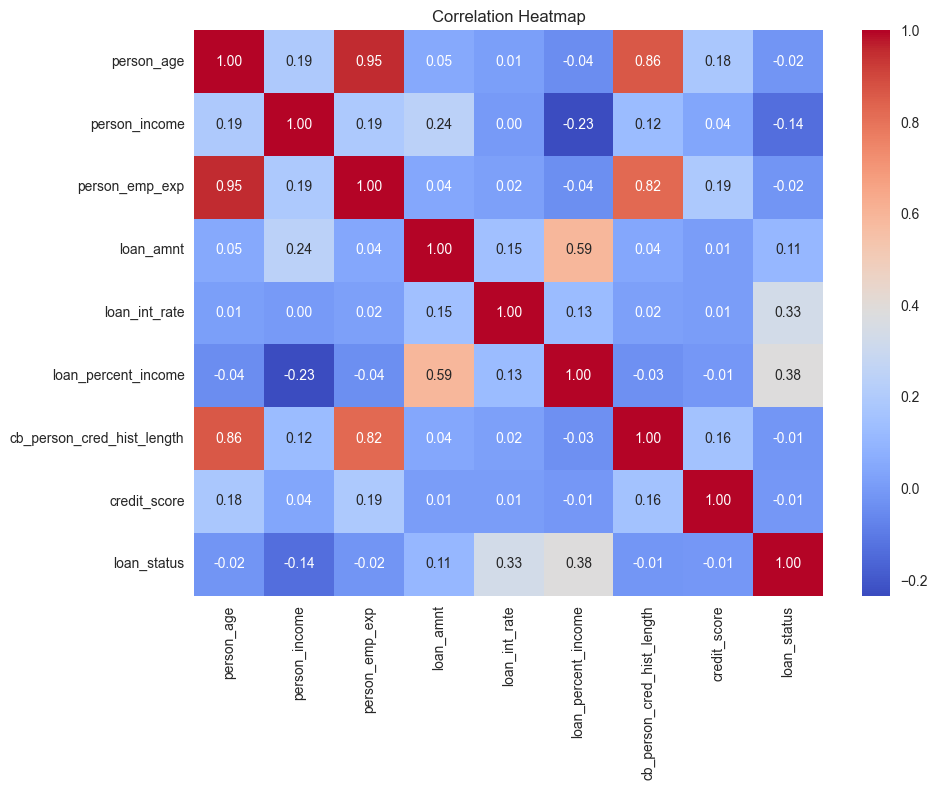

In [8]:
# ============================================
# 8. Correlation Heatmap
# ============================================

numeric_only = df.select_dtypes(include=['float64','int64'])
corr = numeric_only.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../results/eda_plots/correlation_heatmap.png")
plt.show()

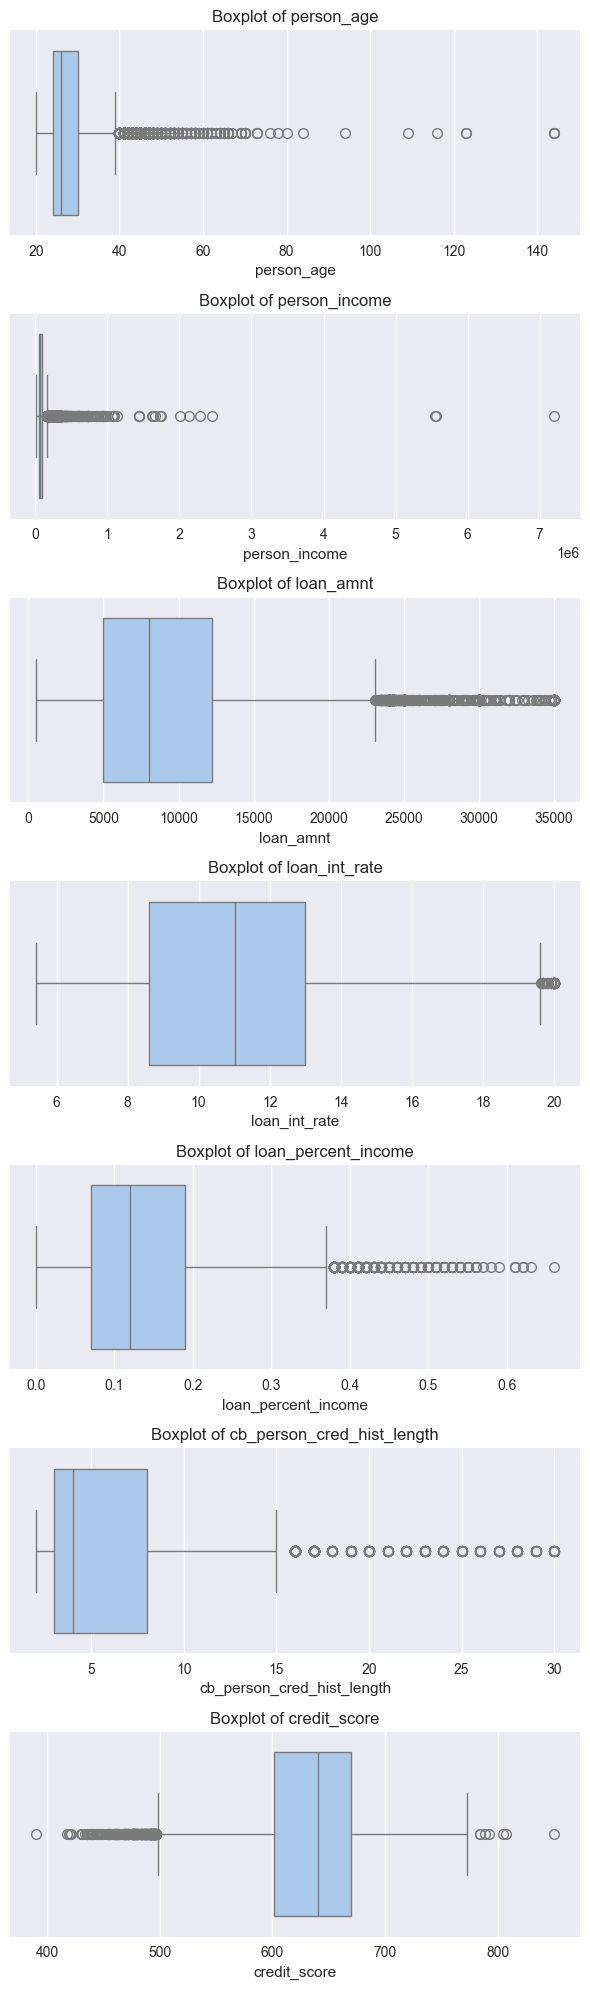

In [9]:
# ============================================
# 9. Boxplots (Outlier Detection)
# ============================================

cols = ["person_age","person_income","loan_amnt","loan_int_rate",
        "loan_percent_income","cb_person_cred_hist_length","credit_score"]

plt.figure(figsize=(6,20))

for i, col in enumerate(cols):
    plt.subplot(len(cols),1,i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig("../results/eda_plots/boxplots.png")
plt.show()

In [14]:
# ============================================
# 10. Save Cleaned Data
# ============================================

df_clean = df[df["person_age"] <= 100].copy()
df_clean.to_csv("../data/processed/cleaned_data.csv", index=False)

df_clean.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
